# Health Population

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
health_df = pd.read_excel("Health_Population.xlsx")
health_df.head()

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI
0,Argentina,7.796,706.904994,73.755805,180.641,92.799,1.110875,51.072396,48.927604,37057452,16458321,2.561,19.413,7440
1,Austria,9.600,2415.782386,78.126829,126.288,63.086,0.240467,51.465237,48.534763,8011566,3899156,1.360,9.800,26790
2,Australia,6.700,1745.925306,79.234146,97.967,56.110,1.192272,50.112224,49.887776,19153000,9603052,1.756,13.000,21130
3,Brazil,5.994,262.758717,70.016390,247.531,125.460,1.452901,50.582216,49.417784,175287587,79593872,2.300,20.204,3860
4,Cambodia,9.426,17.630712,58.350878,292.208,226.730,2.236057,51.399769,48.600231,12152354,5579215,3.805,28.058,300


## Data exploration

### Clustering the given data only based on the following features:

In [5]:
features = ['Country Name', 'Death Rate', 'Health Expend', 'Life Exp', 'Male Mortality', 'Female Mortality']
health = health_df[features]
health.head()

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality
0,Argentina,7.796,706.904994,73.755805,180.641,92.799
1,Austria,9.600,2415.782386,78.126829,126.288,63.086
2,Australia,6.700,1745.925306,79.234146,97.967,56.110
3,Brazil,5.994,262.758717,70.016390,247.531,125.460
4,Cambodia,9.426,17.630712,58.350878,292.208,226.730


In [6]:
# breifly check the data types of the variables
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      38 non-null     object 
 1   Death Rate        38 non-null     float64
 2   Health Expend     38 non-null     float64
 3   Life Exp          38 non-null     float64
 4   Male Mortality    38 non-null     float64
 5   Female Mortality  38 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.9+ KB


### -> no change in data types is needed

### * Find the max values of the five predictor variables

In [7]:
# using for loop to calculate the maximum values of each and every column
for i in range(1, 6):
    max_val = health.iloc[:, i].max()
    print(health.columns[i], ": ", max_val)

Death Rate :  15.955
Health Expend :  4788.31156037
Life Exp :  81.07609756097563
Male Mortality :  493.454
Female Mortality :  374.819


### * Find the min values of the five predictor variables

In [9]:
# using for loop to calculate the minimum values of each and every column
for i in range(1, 6):
    min_val = health.iloc[:, i].min()
    print(health.columns[i], ": ", min_val)

Death Rate :  2.527
Health Expend :  5.36828664
Life Exp :  50.00287804878049
Male Mortality :  87.19
Female Mortality :  47.577


## Preprocessing

### * Create box plots to check outliers and skewness

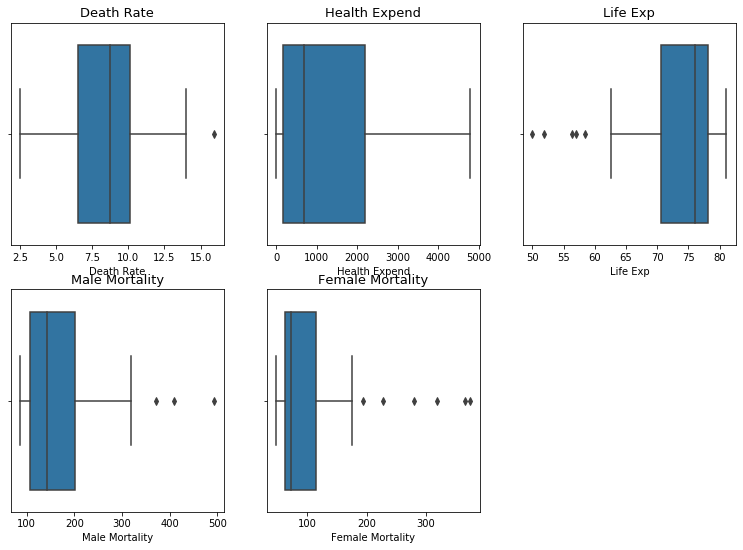

In [10]:
# Distribution of Time spent on App, Web and Length of Membership
plt.figure(figsize=(13,9))

plt.subplot(231)
sns.boxplot('Death Rate', data=health)
plt.title('Death Rate', fontsize=13);

plt.subplot(232)
sns.boxplot('Health Expend', data=health)
plt.title('Health Expend', fontsize=13);

plt.subplot(233)
sns.boxplot('Life Exp', data=health)
plt.title('Life Exp', fontsize=13);

plt.subplot(234)
sns.boxplot('Male Mortality', data=health)
plt.title('Male Mortality', fontsize=13);

plt.subplot(235)
sns.boxplot('Female Mortality', data=health)
plt.title('Female Mortality', fontsize=13);

### ->  outliers are observed: leave them to keep all the given countries
### ->  'Health Expend', 'Male Mortality', 'Female Mortality': right skeweness                                                                        | 'Life Exp': left skeweness

### * Fix the skewed columns 

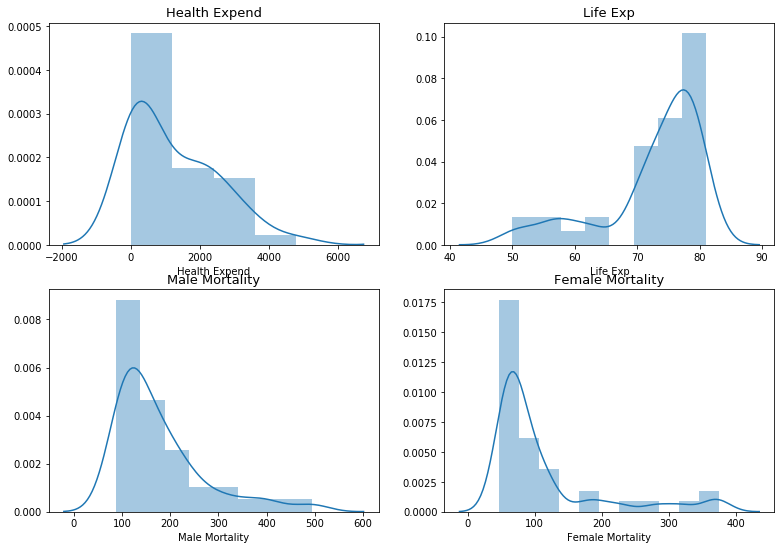

In [11]:
# Distribution of each column that seems skewed
plt.figure(figsize=(13,9))

plt.subplot(221)
sns.distplot(health['Health Expend'])
plt.title('Health Expend', fontsize=13);

plt.subplot(222)
sns.distplot(health['Life Exp'])
plt.title('Life Exp', fontsize=13);

plt.subplot(223)
sns.distplot(health['Male Mortality'])
plt.title('Male Mortality', fontsize=13);

plt.subplot(224)
sns.distplot(health['Female Mortality'])
plt.title('Female Mortality', fontsize=13);

### -> these columns are apparently skewed

### * Log transformation to improve the skewed data 

In [12]:
skewed_col = list(health.columns[2:6])
health[skewed_col] = np.log(health[skewed_col])
health.head()

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality
0,Argentina,7.796,6.560896,4.300760,5.196512,4.530436
1,Austria,9.600,7.789778,4.358334,4.838565,4.144499
2,Australia,6.700,7.465040,4.372407,4.584631,4.027314
3,Brazil,5.994,5.571236,4.248729,5.511536,4.831987
4,Cambodia,9.426,2.869642,4.066474,5.677466,5.423760


In [13]:
health.describe()

,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,8.481368,6.061758,4.277245,5.069391,4.526474
std,2.659986,1.933259,0.125605,0.445241,0.574236
min,2.527000,1.680509,3.912081,4.468090,3.862349
25%,6.523750,5.070611,4.257419,4.673348,4.122937
50%,8.696000,6.527929,4.331715,4.968538,4.275957
75%,10.100000,7.687708,4.357771,5.308171,4.737022
max,15.955000,8.473933,4.395388,6.201430,5.926443


### -> Now, mean and median of the skewed columns are pretty close

### * check the cleaned dataset 

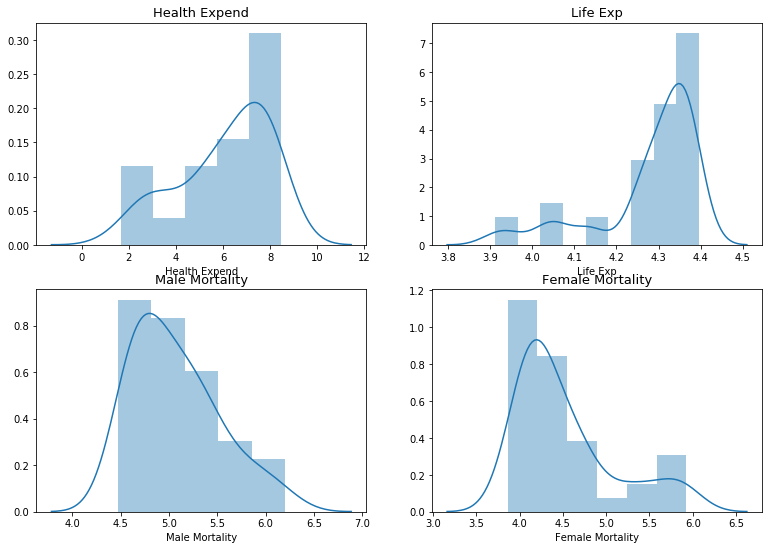

In [14]:
# Distribution of Time spent on App, Web and Length of Membership
plt.figure(figsize=(13,9))

plt.subplot(221)
sns.distplot(health['Health Expend'])
plt.title('Health Expend', fontsize=13);

plt.subplot(222)
sns.distplot(health['Life Exp'])
plt.title('Life Exp', fontsize=13);

plt.subplot(223)
sns.distplot(health['Male Mortality'])
plt.title('Male Mortality', fontsize=13);

plt.subplot(224)
sns.distplot(health['Female Mortality'])
plt.title('Female Mortality', fontsize=13);

### -> the variables seem to have become relatively more normal compared to the original data

### * Standardize the variables to avoid biased clusters resulting from the different scales

In [15]:
from sklearn.preprocessing import StandardScaler
# select only independent variables (continous data type)
X_features = list(health.columns[1:])

# scaling
scaler = StandardScaler()
scaled_health = scaler.fit_transform(health[X_features])

### -> all the columns now have the same means (= 0) and standard deviations (= 1)

## K-means clustering

Text(0.5, 1.0, 'Elbow Diagram')

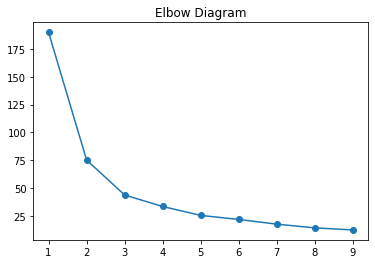

In [27]:
cluster_range = range(1, 10)
cluster_errors = []
for cluster_num in cluster_range:
    clusters = KMeans(cluster_num)
    clusters.fit(scaled_health)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize = (6, 4))
plt.plot(cluster_range, cluster_errors, marker = "o")
plt.title("Elbow Diagram")

### * Number of clusters = 4

In [16]:
from sklearn.cluster import KMeans

In [17]:
k = 4  # the given number of clusters
clusters = KMeans(k, random_state = 123)
clusters.fit(scaled_health)  # fit cluster using the scaled data values
health["Clusterid"] = clusters.labels_
health_df["Clusterid"] = clusters.labels_ # add "clusterid" column to both health & health_df data frame with the corresponding cluster id
health.head(5)


,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Clusterid
0,Argentina,7.796,6.560896,4.300760,5.196512,4.530436,0
1,Austria,9.600,7.789778,4.358334,4.838565,4.144499,2
2,Australia,6.700,7.465040,4.372407,4.584631,4.027314,2
3,Brazil,5.994,5.571236,4.248729,5.511536,4.831987,0
4,Cambodia,9.426,2.869642,4.066474,5.677466,5.423760,3


In [19]:
health_df.head(5)

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI,Clusterid
0,Argentina,7.796,706.904994,73.755805,180.641,92.799,1.110875,51.072396,48.927604,37057452,16458321,2.561,19.413,7440,0
1,Austria,9.600,2415.782386,78.126829,126.288,63.086,0.240467,51.465237,48.534763,8011566,3899156,1.360,9.800,26790,2
2,Australia,6.700,1745.925306,79.234146,97.967,56.110,1.192272,50.112224,49.887776,19153000,9603052,1.756,13.000,21130,2
3,Brazil,5.994,262.758717,70.016390,247.531,125.460,1.452901,50.582216,49.417784,175287587,79593872,2.300,20.204,3860,0
4,Cambodia,9.426,17.630712,58.350878,292.208,226.730,2.236057,51.399769,48.600231,12152354,5579215,3.805,28.058,300,3


In [20]:
# Select the rows whose cluster id is 0
country_0 = health_df[health_df["Clusterid"] == 0]
country_0

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI,Clusterid
0,Argentina,7.796,706.904994,73.755805,180.641,92.799,1.110875,51.072396,48.927604,37057452,16458321,2.561,19.413,7440,0
3,Brazil,5.994,262.758717,70.016390,247.531,125.460,1.452901,50.582216,49.417784,175287587,79593872,2.300,20.204,3860,0
6,China,6.450,43.626109,71.995585,123.629,91.798,0.787957,48.643896,51.356104,1262645000,734852598,1.497,14.030,940,0
7,Colombia,5.644,146.006666,70.988707,230.093,111.186,1.457656,50.547110,49.452890,40403958,16763699,2.389,20.959,2320,0
11,Ecuador,5.222,49.009471,72.944171,200.974,115.080,1.837286,49.866121,50.133879,12628596,5597173,3.027,24.922,1540,0
21,"Korea, Rep.",5.200,504.904031,75.835366,159.723,61.326,0.836181,49.825577,50.174423,47008111,22810817,1.467,13.300,10740,0
22,Kuwait,2.527,490.548553,73.323707,105.014,70.208,4.675478,41.557463,58.442537,2050741,987618,2.845,22.829,17930,0
24,Mexico,4.655,322.088650,74.299732,166.094,93.231,1.404926,50.347243,49.652757,101719673,40336551,2.716,24.132,5810,0
28,Peru,5.788,94.971000,70.507439,186.297,120.860,1.373783,50.025468,49.974532,25914879,11502868,2.929,24.100,2010,0
29,Poland,9.600,247.141098,73.748780,218.944,86.932,-1.044335,51.452492,48.547508,38258629,17319062,1.370,9.900,4660,0


In [21]:
# Select the rows whose cluster id is 1
country_1 = health_df[health_df["Clusterid"] == 1]
country_1

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI,Clusterid
8,"Congo, Dem. Rep.",15.955,18.159123,50.002878,370.806,317.698,2.533546,50.411344,49.588656,47076387,18517555,6.751,45.964,130,1
12,Ethiopia,14.015,5.368287,51.933829,408.870,365.537,2.892891,50.138279,49.861721,66537331,28995215,6.529,43.714,120,1
31,South Africa,11.624,245.057282,56.368317,493.454,374.819,1.488015,50.926756,49.073244,44896856,15803467,2.829,24.329,3070,1


In [22]:
# Select the rows whose cluster id is 2
country_2 = health_df[health_df["Clusterid"] == 2]
country_2

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI,Clusterid
1,Austria,9.60,2415.782386,78.126829,126.288,63.086,0.240467,51.465237,48.534763,8011566,3899156,1.360,9.80,26790,2
2,Australia,6.70,1745.925306,79.234146,97.967,56.110,1.192272,50.112224,49.887776,19153000,9603052,1.756,13.00,21130,2
5,Canada,7.10,2099.841455,79.236585,100.968,61.077,0.882999,50.464688,49.535312,30769700,16235329,1.490,10.90,22610,2
9,Croatia,11.20,371.224400,72.807805,174.609,70.950,-2.850973,51.858382,48.141618,4426000,1963073,1.390,9.80,5290,2
10,Denmark,10.90,2612.692686,76.592683,125.852,78.827,0.334234,50.518630,49.481370,5339616,2863219,1.770,12.60,32660,2
13,Finland,9.50,1700.319728,77.465854,143.868,63.000,0.207607,51.183482,48.816518,5176209,2586077,1.730,11.00,26420,2
14,France,8.90,2209.243730,79.056098,138.397,60.836,0.684931,50.973569,49.026431,60912498,27479571,1.890,13.30,25150,2
15,Germany,10.20,2397.753676,77.926829,125.466,63.374,0.135432,51.305025,48.694975,82211508,40252431,1.380,9.30,26210,2
18,Ireland,8.20,1593.343372,76.536585,119.264,70.026,1.333043,50.263356,49.736644,3805174,1775844,1.890,14.40,24100,2
19,Japan,7.70,2838.599244,81.076098,98.200,47.577,0.167276,50.891838,49.108162,126843000,67670439,1.359,9.40,36230,2


In [23]:
# Select the rows whose cluster id is 3
country_3 = health_df[health_df["Clusterid"] == 3]
country_3 

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI,Clusterid
4,Cambodia,9.426,17.630712,58.350878,292.208,226.730,2.236057,51.399769,48.600231,12152354,5579215,3.805,28.058,300,3
16,Ghana,10.701,12.266565,56.985098,319.064,279.940,2.465088,49.495196,50.504804,18938762,8233103,4.826,35.446,340,3
17,India,8.692,19.609108,62.593390,250.112,193.149,1.773546,48.196848,51.803152,1053050912,405518817,3.311,26.463,440,3
27,Pakistan,8.728,15.498242,62.758171,202.317,174.339,2.276383,48.404962,51.595038,138523285,41617498,4.580,32.035,490,3


## Question 1 - Is data standardization necessary in this case?

## Answer: Due to the differences in the predictors' scales, the data can be clustered weighing more on certain predictors containing data whose scales are much bigger or smaller than others. In the given five columns for this task, the "Health Expend" column has the data even larger than the other column's data and the scale of the "Death Rate" is much smaller than the others. So, by moving the means of all the five columns' data to 0 and their standard deviations to 1, unbiased clustering can be expected.

In [24]:
# refering to the original data scales
health_df[X_features].head()

,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality
0,7.796,706.904994,73.755805,180.641,92.799
1,9.600,2415.782386,78.126829,126.288,63.086
2,6.700,1745.925306,79.234146,97.967,56.110
3,5.994,262.758717,70.016390,247.531,125.460
4,9.426,17.630712,58.350878,292.208,226.730


## Question 2 - What is the size and the average GNI per capita for the largest cluster of countries?

In [25]:
print("id 0:", len(country_0))
print("id 1:", len(country_1))
print("id 2:", len(country_2))
print("id 3:", len(country_3))

id 0: 12
id 1: 3
id 2: 19
id 3: 4


In [26]:
print("Average GNI:", country_2["GNI"].mean(axis = 0))

Average GNI: 27232.105263157893


## Answer: countries matched to id = 2 is the largest cluster 
## (1) Size = 19
## (2) Average GNI per capita = 27232.11